In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ge-stock/ge.us.txt


# Reading and Analysing the data

In [4]:
input_path = '/kaggle/input/ge-stock'
input = os.path.join(input_path,'ge.us.txt')
df_ge = pd.read_csv(input)

In [5]:
df_ge.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0


In [6]:
df_ge.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
14053,2017-11-06,20.52,20.530,20.08,20.13,60641787,0
14054,2017-11-07,20.17,20.250,20.12,20.21,41622851,0
14055,2017-11-08,20.21,20.320,20.07,20.12,39672190,0
14056,2017-11-09,20.04,20.071,19.85,19.99,50831779,0
14057,2017-11-10,19.98,20.680,19.90,20.49,100698474,0


In [7]:
df_ge.columns[1:]

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

**Plotting Data**

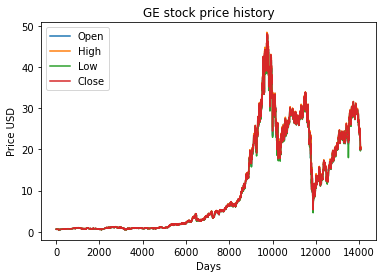

In [8]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(df_ge['Open'])
plt.plot(df_ge['High'])
plt.plot(df_ge['Low'])
plt.plot(df_ge['Close'])
plt.title('GE stock price history')
plt.xlabel('Days')
plt.ylabel('Price USD')
plt.legend(['Open','High','Low','Close'], loc = 'upper left')
plt.show()

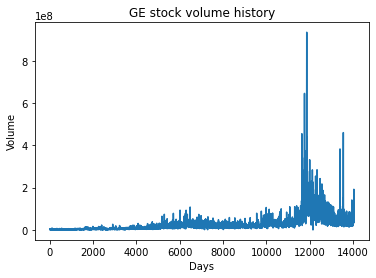

In [9]:
plt.figure()
plt.plot(df_ge['Volume'])
plt.title('GE stock volume history')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.show()

*Checking for nan values*

In [10]:
df_ge.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [11]:
df_ge.shape

(14058, 7)

**Data Split using Mid price of High and Low Prices**

In [54]:
high_prices = np.array(df_ge.loc[:,'High'])
low_prices = np.array(df_ge.loc[:,'Low'])
mid_prices = (high_prices + low_prices)/2.0

In [55]:
mid_prices = mid_prices.reshape(-1,1)

In [56]:
mid_prices.shape

(14058, 1)

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mid_prices = scaler.fit_transform(mid_prices)

In [74]:
mid_prices = mid_prices.reshape(-1)
mid_prices.shape

(14058,)

In [80]:
train_data = mid_prices[:10000]
test_data = mid_prices[10000:]

**Data Normalization : Window Normalisation**

In [81]:
train_data.shape

(10000,)

In [17]:
# window_size = 2500
# for i in range(0,10000,window_size):
#     scaler.fit(train_data[i:i+window_size,:])
#     train_data[i:i+window_size, :] = scaler.transform(train_data[i:i + window_size, :])

    
# scaler.fit(train_data[i+window_size :, :])
# train_data[i+window_size:,:] = scaler.transform(train_data[i+window_size :, :])

In [18]:
# train_data.reshape(-1)

# test_data = scaler.transform(test_data)

In [82]:
test_data.shape

(4058,)

In [83]:
train_data.shape

(10000,)

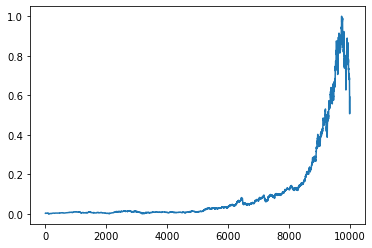

In [84]:
plt.figure()
plt.plot(train_data)
plt.show()

**Smoothing Data using Exponential moving average**

In [61]:
EMA = 0.0
gamma = 0.1
for ti in range(11000):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    

In [62]:
all = np.concatenate([train_data,test_data], axis = 0)

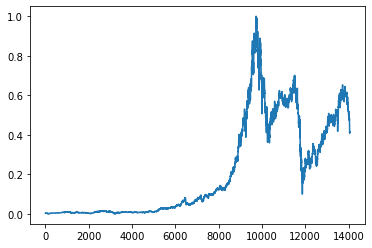

In [63]:
plt.figure()
plt.plot(all)
plt.show()

In [25]:
all.reshape(-2,)

array([0.26429453, 0.24554248, 0.23890113, ..., 0.16783616, 0.15294491,
       0.17386887])

In [26]:
all.shape

(14058, 1)

**Converting Array Values into Dataset Matrix**

In [86]:
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [87]:
def create_dataset(dataset, time_step = 1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - time_step - 1):
#         dataX = []
#         dataY = []
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    
    return np.array(dataX), np.array(dataY)         
    



In [219]:
time_step = 1000
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [220]:
print(X_train.shape)
print(train_data.shape)

(8999, 1000)
(10000, 1)


Reshaping input into 3d : [samples, time_steps, features]

In [221]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)

(8999, 1000, 1)
(3057, 1000, 1)


# Creating LSTM model

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,Activation

In [222]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (1000,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
#model.add(Dropout(0.2))

model.add(Dense(1))
#model.add(Activation('linear'))


In [223]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [224]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 1000, 50)          10400     
_________________________________________________________________
dropout_17 (Dropout)         (None, 1000, 50)          0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 1000, 50)          20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 1000, 50)          0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________

In [226]:
model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 50, batch_size = 128)

Epoch 1/50
71/71 [==============================] - 11s 149ms/step - loss: 3.1112e-04 - accuracy: 1.1112e-04 - val_loss: 3.7175e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
71/71 [==============================] - 11s 149ms/step - loss: 2.5020e-04 - accuracy: 1.1112e-04 - val_loss: 4.0415e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
71/71 [==============================] - 11s 150ms/step - loss: 2.7399e-04 - accuracy: 1.1112e-04 - val_loss: 3.2473e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
71/71 [==============================] - 11s 149ms/step - loss: 2.3214e-04 - accuracy: 1.1112e-04 - val_loss: 4.7202e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
71/71 [==============================] - 11s 149ms/step - loss: 2.3522e-04 - accuracy: 1.1112e-04 - val_loss: 3.1666e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
71/71 [==============================] - 11s 149ms/step - loss: 2.5629e-04 - accuracy: 1.1112e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 7/50
71/71 [==============================] 

In [227]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [135]:
train_predict.shape

(9969, 1)

In [175]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

* **Calculating Root Mean Square Performance metrics**

In [176]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10.871111395576092

In [177]:
math.sqrt(mean_squared_error(y_test,test_predict))

22.797353243172957

**Plotting**

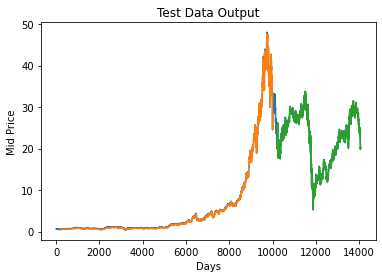

In [179]:
look_back = 1000
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Test Data Output')
plt.xlabel('Days')
plt.ylabel('Mid Price')
plt.show()

In [145]:
df = pd.DataFrame((df_ge['High'] + df_ge['Low'])/2)

In [146]:
df.head()

,0
0,0.62815
1,0.61615
2,0.61190
3,0.59600
4,0.58365


In [147]:
df.tail()

,0
14053,20.3050
14054,20.1850
14055,20.1950
14056,19.9605
14057,20.2900


In [149]:
df.shape


(14058, 1)

In [163]:
scaler= MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

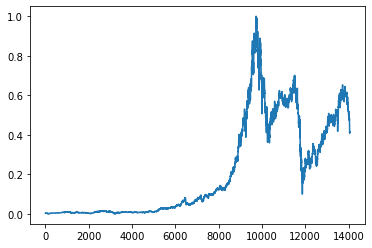

In [164]:
plt.figure()
plt.plot(df)

# Predicting Future

In [183]:
len(test_data)

4058

In [188]:
x_input = test_data[(4058-1000):].reshape(1,-1)
x_input.shape

(1, 200)

In [189]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [190]:
temp_input

[0.6033192567851653,
 0.5985156557451489,
 0.5982108320467671,
 0.5965710907727133,
 0.5979060083483853,
 0.597695785108122,
 0.5979060083483853,
 0.5923666259674474,
 0.5960665549960814,
 0.5974855618678587,
 0.6025098973101516,
 0.6067038509534045,
 0.6100884451216435,
 0.612537545870711,
 0.611202628295039,
 0.6141772871447648,
 0.6129474811892244,
 0.6088271056800638,
 0.6134730392898826,
 0.6100674227976172,
 0.6069771411657467,
 0.6113077399151707,
 0.6119278984739474,
 0.6122957891444082,
 0.6095523758589722,
 0.6072399202160759,
 0.6061467593667067,
 0.6032561898130863,
 0.6101620232557357,
 0.6100779339596304,
 0.6019212722374144,
 0.6023206963939146,
 0.6037712367517314,
 0.6075972997245235,
 0.6055371119699431,
 0.6013011136786376,
 0.5994406380023074,
 0.6003656202594658,
 0.6027516540364544,
 0.5967602916889504,
 0.5990201915217808,
 0.6009962899802558,
 0.6056317124280616,
 0.6072819648641284,
 0.6069245853556808,
 0.6073975876462733,
 0.6133784388317642,
 0.6105404250882

In [201]:
from numpy import array
lst_output = []
n_steps = 1000
i = 0

while(i < 100):
    if(len(temp_input) > 1000):
        x_input = np.array(temp_input[1:])
        print('{} day input {}',i,x_input)
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print('{} day output {}', i,yhat)
        temp_input.extend(yaht[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
        
print(lst_output)        

{} day input {} 0 [0.56576287 0.56461716 0.56050729 0.55701759 0.55442133 0.55338073
 0.5590988  0.56055985 0.54348972 0.53443961 0.53193796 0.53526999
 0.5437525  0.54537122 0.54849304 0.5481777  0.54875581 0.55098418
 0.54869275 0.52387589 0.52319267 0.52204695 0.52174213 0.52445401
 0.52403356 0.52299296 0.52100635 0.52070152 0.52267762 0.52600966
 0.52465372 0.52533695 0.52299296 0.52091175 0.51736949 0.51913536
 0.51508856 0.51382722 0.50883442 0.50217034 0.49941642 0.50261181
 0.4992062  0.49863859 0.49978431 0.50046754 0.49759799 0.49655738
 0.50009965 0.5085296  0.50686883 0.50903413 0.4938455  0.48553118
 0.48479539 0.4859306  0.49093391 0.49207963 0.49404522 0.49993147
 0.49998402 0.50119281 0.50550238 0.51391026 0.51623428 0.51727488
 0.50886595 0.50129792 0.49803946 0.50234903 0.50707906 0.50876084
 0.50245415 0.50192859 0.48857941 0.48458517 0.47417912 0.47270756
 0.47502001 0.47817336 0.47649158 0.47754269 0.48258805 0.47323312
 0.46986954 0.45347213 0.44432742 0.44075363

{} day output {} 4 [[0.41386232]]
{} day input {} 5 [0.55338073 0.5590988  0.56055985 0.54348972 0.53443961 0.53193796
 0.53526999 0.5437525  0.54537122 0.54849304 0.5481777  0.54875581
 0.55098418 0.54869275 0.52387589 0.52319267 0.52204695 0.52174213
 0.52445401 0.52403356 0.52299296 0.52100635 0.52070152 0.52267762
 0.52600966 0.52465372 0.52533695 0.52299296 0.52091175 0.51736949
 0.51913536 0.51508856 0.51382722 0.50883442 0.50217034 0.49941642
 0.50261181 0.4992062  0.49863859 0.49978431 0.50046754 0.49759799
 0.49655738 0.50009965 0.5085296  0.50686883 0.50903413 0.4938455
 0.48553118 0.48479539 0.4859306  0.49093391 0.49207963 0.49404522
 0.49993147 0.49998402 0.50119281 0.50550238 0.51391026 0.51623428
 0.51727488 0.50886595 0.50129792 0.49803946 0.50234903 0.50707906
 0.50876084 0.50245415 0.50192859 0.48857941 0.48458517 0.47417912
 0.47270756 0.47502001 0.47817336 0.47649158 0.47754269 0.48258805
 0.47323312 0.46986954 0.45347213 0.44432742 0.44075363 0.43118847
 0.42109775

{} day output {} 9 [[0.41386232]]
{} day input {} 10 [0.53193796 0.53526999 0.5437525  0.54537122 0.54849304 0.5481777
 0.54875581 0.55098418 0.54869275 0.52387589 0.52319267 0.52204695
 0.52174213 0.52445401 0.52403356 0.52299296 0.52100635 0.52070152
 0.52267762 0.52600966 0.52465372 0.52533695 0.52299296 0.52091175
 0.51736949 0.51913536 0.51508856 0.51382722 0.50883442 0.50217034
 0.49941642 0.50261181 0.4992062  0.49863859 0.49978431 0.50046754
 0.49759799 0.49655738 0.50009965 0.5085296  0.50686883 0.50903413
 0.4938455  0.48553118 0.48479539 0.4859306  0.49093391 0.49207963
 0.49404522 0.49993147 0.49998402 0.50119281 0.50550238 0.51391026
 0.51623428 0.51727488 0.50886595 0.50129792 0.49803946 0.50234903
 0.50707906 0.50876084 0.50245415 0.50192859 0.48857941 0.48458517
 0.47417912 0.47270756 0.47502001 0.47817336 0.47649158 0.47754269
 0.48258805 0.47323312 0.46986954 0.45347213 0.44432742 0.44075363
 0.43118847 0.42109775 0.41552684 0.41584217 0.40769602 0.41279393
 0.4172086

{} day output {} 13 [[0.41386232]]
{} day input {} 14 [0.54849304 0.5481777  0.54875581 0.55098418 0.54869275 0.52387589
 0.52319267 0.52204695 0.52174213 0.52445401 0.52403356 0.52299296
 0.52100635 0.52070152 0.52267762 0.52600966 0.52465372 0.52533695
 0.52299296 0.52091175 0.51736949 0.51913536 0.51508856 0.51382722
 0.50883442 0.50217034 0.49941642 0.50261181 0.4992062  0.49863859
 0.49978431 0.50046754 0.49759799 0.49655738 0.50009965 0.5085296
 0.50686883 0.50903413 0.4938455  0.48553118 0.48479539 0.4859306
 0.49093391 0.49207963 0.49404522 0.49993147 0.49998402 0.50119281
 0.50550238 0.51391026 0.51623428 0.51727488 0.50886595 0.50129792
 0.49803946 0.50234903 0.50707906 0.50876084 0.50245415 0.50192859
 0.48857941 0.48458517 0.47417912 0.47270756 0.47502001 0.47817336
 0.47649158 0.47754269 0.48258805 0.47323312 0.46986954 0.45347213
 0.44432742 0.44075363 0.43118847 0.42109775 0.41552684 0.41584217
 0.40769602 0.41279393 0.41720862 0.41468594 0.41489617 0.40996643
 0.4168932

{} day output {} 19 [[0.41386232]]
{} day input {} 20 [0.52319267 0.52204695 0.52174213 0.52445401 0.52403356 0.52299296
 0.52100635 0.52070152 0.52267762 0.52600966 0.52465372 0.52533695
 0.52299296 0.52091175 0.51736949 0.51913536 0.51508856 0.51382722
 0.50883442 0.50217034 0.49941642 0.50261181 0.4992062  0.49863859
 0.49978431 0.50046754 0.49759799 0.49655738 0.50009965 0.5085296
 0.50686883 0.50903413 0.4938455  0.48553118 0.48479539 0.4859306
 0.49093391 0.49207963 0.49404522 0.49993147 0.49998402 0.50119281
 0.50550238 0.51391026 0.51623428 0.51727488 0.50886595 0.50129792
 0.49803946 0.50234903 0.50707906 0.50876084 0.50245415 0.50192859
 0.48857941 0.48458517 0.47417912 0.47270756 0.47502001 0.47817336
 0.47649158 0.47754269 0.48258805 0.47323312 0.46986954 0.45347213
 0.44432742 0.44075363 0.43118847 0.42109775 0.41552684 0.41584217
 0.40769602 0.41279393 0.41720862 0.41468594 0.41489617 0.40996643
 0.41689329 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.4153259

{} day output {} 24 [[0.4138623]]
{} day input {} 25 [0.52299296 0.52100635 0.52070152 0.52267762 0.52600966 0.52465372
 0.52533695 0.52299296 0.52091175 0.51736949 0.51913536 0.51508856
 0.51382722 0.50883442 0.50217034 0.49941642 0.50261181 0.4992062
 0.49863859 0.49978431 0.50046754 0.49759799 0.49655738 0.50009965
 0.5085296  0.50686883 0.50903413 0.4938455  0.48553118 0.48479539
 0.4859306  0.49093391 0.49207963 0.49404522 0.49993147 0.49998402
 0.50119281 0.50550238 0.51391026 0.51623428 0.51727488 0.50886595
 0.50129792 0.49803946 0.50234903 0.50707906 0.50876084 0.50245415
 0.50192859 0.48857941 0.48458517 0.47417912 0.47270756 0.47502001
 0.47817336 0.47649158 0.47754269 0.48258805 0.47323312 0.46986954
 0.45347213 0.44432742 0.44075363 0.43118847 0.42109775 0.41552684
 0.41584217 0.40769602 0.41279393 0.41720862 0.41468594 0.41489617
 0.40996643 0.41689329 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.4153259

{} day output {} 29 [[0.4138623]]
{} day input {} 30 [0.52465372 0.52533695 0.52299296 0.52091175 0.51736949 0.51913536
 0.51508856 0.51382722 0.50883442 0.50217034 0.49941642 0.50261181
 0.4992062  0.49863859 0.49978431 0.50046754 0.49759799 0.49655738
 0.50009965 0.5085296  0.50686883 0.50903413 0.4938455  0.48553118
 0.48479539 0.4859306  0.49093391 0.49207963 0.49404522 0.49993147
 0.49998402 0.50119281 0.50550238 0.51391026 0.51623428 0.51727488
 0.50886595 0.50129792 0.49803946 0.50234903 0.50707906 0.50876084
 0.50245415 0.50192859 0.48857941 0.48458517 0.47417912 0.47270756
 0.47502001 0.47817336 0.47649158 0.47754269 0.48258805 0.47323312
 0.46986954 0.45347213 0.44432742 0.44075363 0.43118847 0.42109775
 0.41552684 0.41584217 0.40769602 0.41279393 0.41720862 0.41468594
 0.41489617 0.40996643 0.41689329 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

{} day output {} 34 [[0.41386232]]
{} day input {} 35 [0.51913536 0.51508856 0.51382722 0.50883442 0.50217034 0.49941642
 0.50261181 0.4992062  0.49863859 0.49978431 0.50046754 0.49759799
 0.49655738 0.50009965 0.5085296  0.50686883 0.50903413 0.4938455
 0.48553118 0.48479539 0.4859306  0.49093391 0.49207963 0.49404522
 0.49993147 0.49998402 0.50119281 0.50550238 0.51391026 0.51623428
 0.51727488 0.50886595 0.50129792 0.49803946 0.50234903 0.50707906
 0.50876084 0.50245415 0.50192859 0.48857941 0.48458517 0.47417912
 0.47270756 0.47502001 0.47817336 0.47649158 0.47754269 0.48258805
 0.47323312 0.46986954 0.45347213 0.44432742 0.44075363 0.43118847
 0.42109775 0.41552684 0.41584217 0.40769602 0.41279393 0.41720862
 0.41468594 0.41489617 0.40996643 0.41689329 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

{} day output {} 40 [[0.41386232]]
{} day input {} 41 [0.50261181 0.4992062  0.49863859 0.49978431 0.50046754 0.49759799
 0.49655738 0.50009965 0.5085296  0.50686883 0.50903413 0.4938455
 0.48553118 0.48479539 0.4859306  0.49093391 0.49207963 0.49404522
 0.49993147 0.49998402 0.50119281 0.50550238 0.51391026 0.51623428
 0.51727488 0.50886595 0.50129792 0.49803946 0.50234903 0.50707906
 0.50876084 0.50245415 0.50192859 0.48857941 0.48458517 0.47417912
 0.47270756 0.47502001 0.47817336 0.47649158 0.47754269 0.48258805
 0.47323312 0.46986954 0.45347213 0.44432742 0.44075363 0.43118847
 0.42109775 0.41552684 0.41584217 0.40769602 0.41279393 0.41720862
 0.41468594 0.41489617 0.40996643 0.41689329 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

{} day output {} 45 [[0.41386232]]
{} day input {} 46 [0.49759799 0.49655738 0.50009965 0.5085296  0.50686883 0.50903413
 0.4938455  0.48553118 0.48479539 0.4859306  0.49093391 0.49207963
 0.49404522 0.49993147 0.49998402 0.50119281 0.50550238 0.51391026
 0.51623428 0.51727488 0.50886595 0.50129792 0.49803946 0.50234903
 0.50707906 0.50876084 0.50245415 0.50192859 0.48857941 0.48458517
 0.47417912 0.47270756 0.47502001 0.47817336 0.47649158 0.47754269
 0.48258805 0.47323312 0.46986954 0.45347213 0.44432742 0.44075363
 0.43118847 0.42109775 0.41552684 0.41584217 0.40769602 0.41279393
 0.41720862 0.41468594 0.41489617 0.40996643 0.41689329 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532

{} day output {} 50 [[0.41386232]]
{} day input {} 51 [0.50903413 0.4938455  0.48553118 0.48479539 0.4859306  0.49093391
 0.49207963 0.49404522 0.49993147 0.49998402 0.50119281 0.50550238
 0.51391026 0.51623428 0.51727488 0.50886595 0.50129792 0.49803946
 0.50234903 0.50707906 0.50876084 0.50245415 0.50192859 0.48857941
 0.48458517 0.47417912 0.47270756 0.47502001 0.47817336 0.47649158
 0.47754269 0.48258805 0.47323312 0.46986954 0.45347213 0.44432742
 0.44075363 0.43118847 0.42109775 0.41552684 0.41584217 0.40769602
 0.41279393 0.41720862 0.41468594 0.41489617 0.40996643 0.41689329
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532

{} day output {} 56 [[0.41386232]]
{} day input {} 57 [0.49207963 0.49404522 0.49993147 0.49998402 0.50119281 0.50550238
 0.51391026 0.51623428 0.51727488 0.50886595 0.50129792 0.49803946
 0.50234903 0.50707906 0.50876084 0.50245415 0.50192859 0.48857941
 0.48458517 0.47417912 0.47270756 0.47502001 0.47817336 0.47649158
 0.47754269 0.48258805 0.47323312 0.46986954 0.45347213 0.44432742
 0.44075363 0.43118847 0.42109775 0.41552684 0.41584217 0.40769602
 0.41279393 0.41720862 0.41468594 0.41489617 0.40996643 0.41689329
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532

{} day output {} 61 [[0.4138623]]
{} day input {} 62 [0.50550238 0.51391026 0.51623428 0.51727488 0.50886595 0.50129792
 0.49803946 0.50234903 0.50707906 0.50876084 0.50245415 0.50192859
 0.48857941 0.48458517 0.47417912 0.47270756 0.47502001 0.47817336
 0.47649158 0.47754269 0.48258805 0.47323312 0.46986954 0.45347213
 0.44432742 0.44075363 0.43118847 0.42109775 0.41552684 0.41584217
 0.40769602 0.41279393 0.41720862 0.41468594 0.41489617 0.40996643
 0.41689329 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

{} day output {} 66 [[0.41386232]]
{} day input {} 67 [0.50129792 0.49803946 0.50234903 0.50707906 0.50876084 0.50245415
 0.50192859 0.48857941 0.48458517 0.47417912 0.47270756 0.47502001
 0.47817336 0.47649158 0.47754269 0.48258805 0.47323312 0.46986954
 0.45347213 0.44432742 0.44075363 0.43118847 0.42109775 0.41552684
 0.41584217 0.40769602 0.41279393 0.41720862 0.41468594 0.41489617
 0.40996643 0.41689329 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532

{} day output {} 71 [[0.41386232]]
{} day input {} 72 [0.50245415 0.50192859 0.48857941 0.48458517 0.47417912 0.47270756
 0.47502001 0.47817336 0.47649158 0.47754269 0.48258805 0.47323312
 0.46986954 0.45347213 0.44432742 0.44075363 0.43118847 0.42109775
 0.41552684 0.41584217 0.40769602 0.41279393 0.41720862 0.41468594
 0.41489617 0.40996643 0.41689329 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532

{} day output {} 75 [[0.41386232]]
{} day input {} 76 [0.47417912 0.47270756 0.47502001 0.47817336 0.47649158 0.47754269
 0.48258805 0.47323312 0.46986954 0.45347213 0.44432742 0.44075363
 0.43118847 0.42109775 0.41552684 0.41584217 0.40769602 0.41279393
 0.41720862 0.41468594 0.41489617 0.40996643 0.41689329 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532

{} day output {} 79 [[0.4138623]]
{} day input {} 80 [0.47649158 0.47754269 0.48258805 0.47323312 0.46986954 0.45347213
 0.44432742 0.44075363 0.43118847 0.42109775 0.41552684 0.41584217
 0.40769602 0.41279393 0.41720862 0.41468594 0.41489617 0.40996643
 0.41689329 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

{} day output {} 83 [[0.4138623]]
{} day input {} 84 [0.46986954 0.45347213 0.44432742 0.44075363 0.43118847 0.42109775
 0.41552684 0.41584217 0.40769602 0.41279393 0.41720862 0.41468594
 0.41489617 0.40996643 0.41689329 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

{} day output {} 87 [[0.4138623]]
{} day input {} 88 [0.43118847 0.42109775 0.41552684 0.41584217 0.40769602 0.41279393
 0.41720862 0.41468594 0.41489617 0.40996643 0.41689329 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

{} day output {} 91 [[0.4138623]]
{} day input {} 92 [0.40769602 0.41279393 0.41720862 0.41468594 0.41489617 0.40996643
 0.41689329 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

{} day output {} 97 [[0.4138623]]
{} day input {} 98 [0.41689329 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591 0.41532591
 0.415325

In [203]:
day_new = np.arange(1,1001)
day_pred = np.arange(1001,1101)

In [206]:
len(df)

14058

In [211]:
dfnew = df.tolist()
dfnew.extend(lst_output)

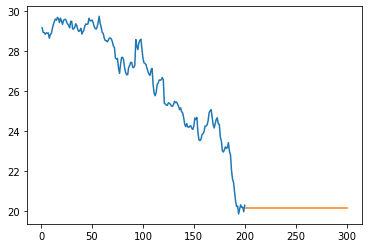

In [208]:
plt.plot(day_new, scaler.inverse_transform(df[(14058-1000):]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

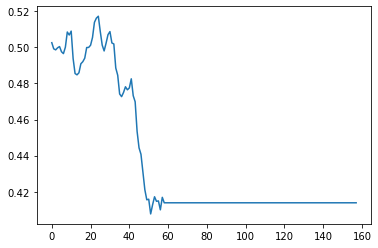

In [215]:
plt.plot(dfnew[14000:])
plt.show()

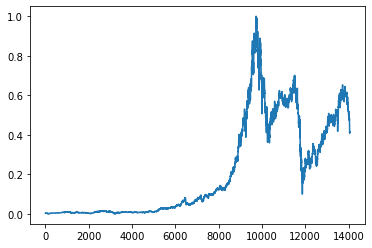

In [213]:
plt.plot(df)
plt.show()